In [30]:
import numpy as np
from scipy.constants import e, hbar, k
import qdot_dynamics as qdd
import matplotlib.pyplot as plt

In [7]:
Rq = hbar*2*np.pi/e**2

In [2]:
deltat = 10e-6*e
epsilon0 = deltat
dV = deltat/e/10
Temp = 0.25*deltat/k
w = 2*np.pi*325e6

dtnum = 1000
tintnum = 325
gammat = w

In [5]:
test = qdd.Measurement(name = "test")

test.setup["deltat"] = deltat
test.setup["epsilon0"] = epsilon0
test.setup["dV"] = dV
test.setup["Temp"] = Temp
test.setup["w"] = w
test.setup["dtnum"] = dtnum
test.setup["tintnum"] = tintnum
test.setup["gammat"] = gammat

In [6]:
result = test.measure()

In [8]:
Gg = result.datas["Gg"]
Rq*Gg*100

0.41297791512545634

In [ ]:
params = [deltat, epsilon0, dV, Temp, w, dtnum, tintnum, gammat]

In [23]:
import time

In [24]:
%%timeit
Cg, Gg, Ce, Ge, rhogt, rhoet = qdd.lindsolve(params = params)

2.27 s ± 40.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Now do this simulation for several different detunings

In [50]:
epsilon0s = np.linspace(-7.5,7.5,60)*deltat
Temps = np.array([0.25,0.5,1])*deltat/k

In [51]:
#create a container for the conductance and the capacitance values
Gcontainer = np.zeros((len(epsilon0s),len(Temps),2))
Ccontainer = np.zeros((len(epsilon0s),len(Temps),2))

#initialize these parameters
params = [deltat, epsilon0, dV, Temp, w, dtnum, tintnum, gammat]

#go through all the detunings and temperatures
for idx1, Temp in enumerate(Temps):
    #set the new temperature value
    params[3] = Temp
    
    for idx2, epsilon0 in enumerate(epsilon0s):
        #set the new detuning value
        params[1] = epsilon0
        
        #carry out the time evolution and calculate the physical quantities
        Cg, Gg, Ce, Ge, rhogt, rhoet = qdd.lindsolve(params = params)
        
        Gcontainer[idx2,idx1,:] = Gg, Ge
        Ccontainer[idx2,idx1,:] = Cg, Ce

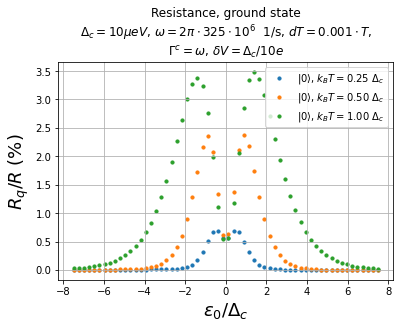

In [62]:
fig = plt.figure()
for i in range(len(Temps)):
    plt.scatter(epsilon0s/deltat, Gcontainer[:,i,0]*Rq*100, s = 10, label = r"$\left | 0 \right >$, $k_B T =$"+ f"{Temps[i]/deltat*k:.2f}"+r" $\Delta_c$")

plt.grid(True)
plt.title("Resistance, ground state"+"\n"+
          r"$\Delta_c = 10 \mu eV$, $\omega = 2 \pi \cdot 325\cdot 10^6~$ 1/s, $dT = 0.001\cdot T$," +"\n" + 
          "$\Gamma^c = \omega$, $\delta V = \Delta_c/10e$")
plt.xlabel(r"$\epsilon_0 / \Delta_c$", fontsize = 18)
plt.ylabel(r"$R_q/R$ (%)", fontsize = 18)
plt.legend()
plt.show()

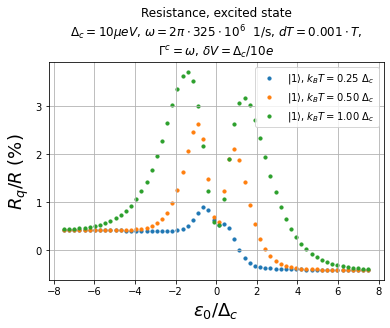

In [64]:
fig = plt.figure()
for i in range(len(Temps)):
    plt.scatter(epsilon0s/deltat, Gcontainer[:,i,1]*Rq*100, s = 10, label = r"$\left | 1 \right >$, $k_B T =$"+ f"{Temps[i]/deltat*k:.2f}"+r" $\Delta_c$")

plt.grid(True)
plt.title("Resistance, excited state"+"\n"+
          r"$\Delta_c = 10 \mu eV$, $\omega = 2 \pi \cdot 325\cdot 10^6~$ 1/s, $dT = 0.001\cdot T$," +"\n" + 
          "$\Gamma^c = \omega$, $\delta V = \Delta_c/10e$")
plt.xlabel(r"$\epsilon_0 / \Delta_c$", fontsize = 18)
plt.ylabel(r"$R_q/R$ (%)", fontsize = 18)
plt.legend()
plt.show()